In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize

In [2]:
# N=20取log bin的函数

def databin_20(lst):
    result = [[]]    
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n ==20:
            n = 0
            result.append([])
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append((np.median(result[j]))) 
    return output

def databin_20_std(lst):
    result = [[]]
    length = len(lst)
    n = 0
    for i in range(length):
        result[-1].append(math.log(lst[i],10))
        n = n+1
        if n == 20:
            n = 0
            result.append([]) 
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

In [3]:
# 参考 08 Arevalo 取log bin的函数

def databin_are(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.mean(result[j]))
    return output        
            

def databin_are_std(lst,f):
    result = [[]]
    f_length = len(f)
    f_i = f[0]
    for i in range(f_length):
        if f[i]<=1.3*f_i:
            result[-1].append(math.log(lst[i],10))
        else:
            if len(result[-1])<=2:
                result[-1].append(math.log(lst[i],10))
            else:
                result.append([])
                result[-1].append(math.log(lst[i],10))
                f_i = f[i]
    result.pop()
    output=[]
    for j in range(len(result)):
        output.append(np.std(result[j]))
    return output

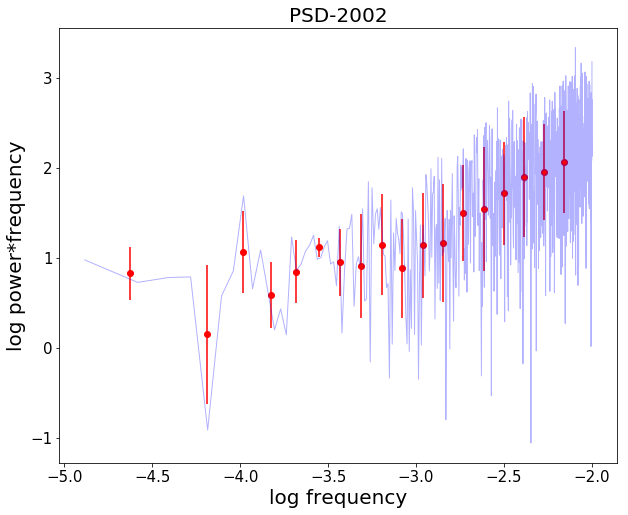

In [4]:
data02 = pd.read_csv("1H0707495_02_rate_0310_tb50_sel.csv")
data02['RATE'] = data02['RATE'].interpolate()


dt=50
counts_data = data02['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_02 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_02 = databin_are(F1,F1)
per_data_binned_02 = databin_are(per_data,F1)
per_data_b_std_02 = databin_are_std(per_data,F1)
p_times_f_data_b_02 = np.array(F1_binned_02)+np.array(per_data_binned_02)


plt.figure(figsize=(10,8))
plt.plot(F1_log_02, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_02, p_times_f_data_b_02, color="r", linewidth=1) 
plt.errorbar(F1_binned_02, p_times_f_data_b_02, yerr=per_data_b_std_02, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2002",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_02 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_02,columns = ['f','per'])
test.to_csv('perlist02.csv')

#perb=[10**i for i in per_data_binned_02]
#fb=[10**i for i in F1_binned_02]
#stdb=[10**i for i in per_data_b_std_02]
#perlistbinned_02 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_02,columns = ['f','per','std'])
#test.to_csv('perlistbinned02.csv')

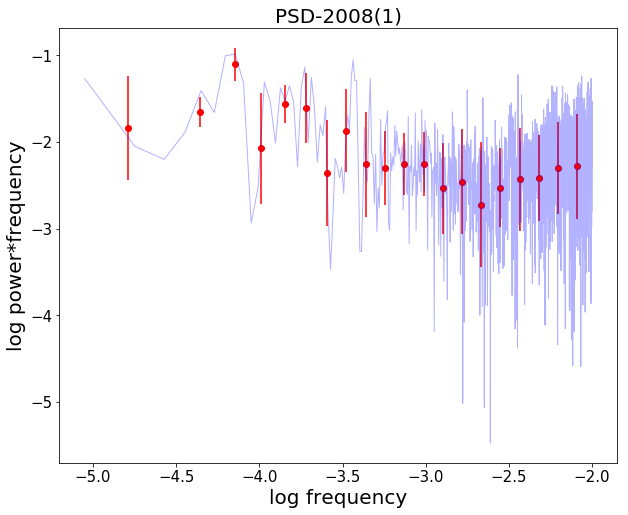

In [5]:
data081 = pd.read_csv("1H0707495_081_rate_0310_tb50_sel.csv")
data081['RATE'] = data081['RATE'].interpolate()


dt=50
counts_data = data081['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_081 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_081 = databin_are(F1,F1)
per_data_binned_081 = databin_are(per_data,F1)
per_data_b_std_081 = databin_are_std(per_data,F1)
p_times_f_data_b_081 = np.array(F1_binned_081)+np.array(per_data_binned_081)


plt.figure(figsize=(10,8))
plt.plot(F1_log_081, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_081, p_times_f_data_b_081, color="r", linewidth=1) 
plt.errorbar(F1_binned_081, p_times_f_data_b_081, yerr=per_data_b_std_081, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2008(1)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_081 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_081,columns = ['f','per'])
test.to_csv('perlist081.csv')

#perb=[10**i for i in per_data_binned_081]
#fb=[10**i for i in F1_binned_081]
#stdb=[10**i for i in per_data_b_std_081]
#perlistbinned_081 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_081,columns = ['f','per','std'])
#test.to_csv('perlistbinned081.csv')

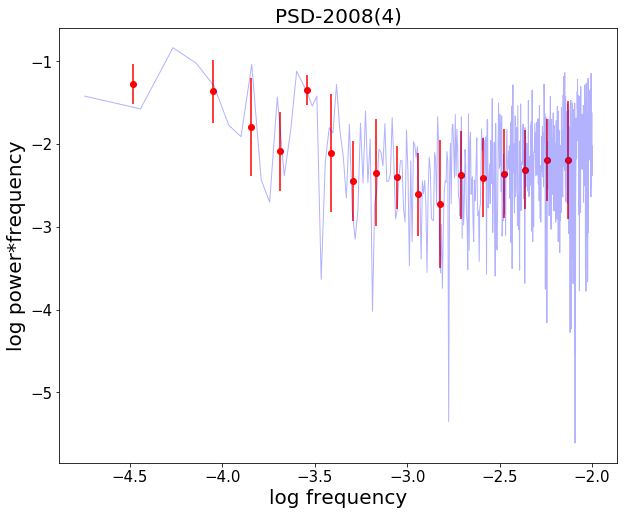

In [6]:
data084 = pd.read_csv("1H0707495_084_rate_0310_tb50_sel.csv")
data084['RATE'] = data084['RATE'].interpolate()


dt=50
counts_data = data084['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_084 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_084 = databin_are(F1,F1)
per_data_binned_084 = databin_are(per_data,F1)
per_data_b_std_084 = databin_are_std(per_data,F1)
p_times_f_data_b_084 = np.array(F1_binned_084)+np.array(per_data_binned_084)


plt.figure(figsize=(10,8))
plt.plot(F1_log_084, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_084, p_times_f_data_b_084, color="r", linewidth=1) 
plt.errorbar(F1_binned_084, p_times_f_data_b_084, yerr=per_data_b_std_084, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2008(4)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_084 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_084,columns = ['f','per'])
test.to_csv('perlist084.csv')

#perb=[10**i for i in per_data_binned_084]
#fb=[10**i for i in F1_binned_084]
#stdb=[10**i for i in per_data_b_std_084]
#perlistbinned_084 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_084,columns = ['f','per','std'])
#test.to_csv('perlistbinned084.csv')

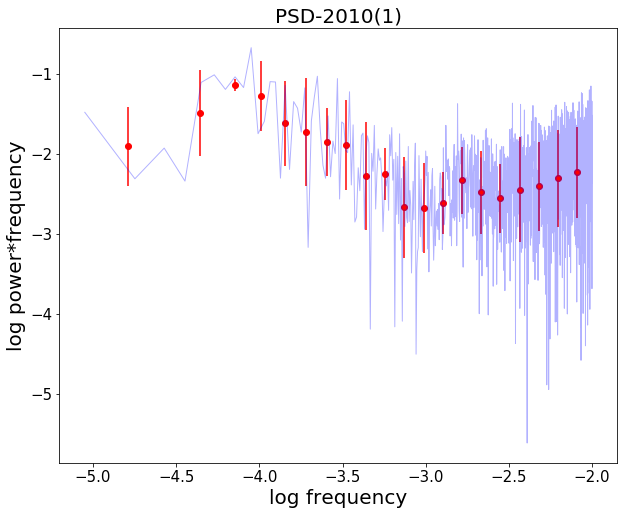

In [7]:
data101 = pd.read_csv("1H0707495_101_rate_0310_tb50_sel.csv")
data101['RATE'] = data101['RATE'].interpolate()


dt=50
counts_data = data101['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_101 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_101 = databin_are(F1,F1)
per_data_binned_101 = databin_are(per_data,F1)
per_data_b_std_101 = databin_are_std(per_data,F1)
p_times_f_data_b_101 = np.array(F1_binned_101)+np.array(per_data_binned_101)


plt.figure(figsize=(10,8))
plt.plot(F1_log_101, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_101, p_times_f_data_b_101, color="r", linewidth=1) 
plt.errorbar(F1_binned_101, p_times_f_data_b_101, yerr=per_data_b_std_101, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2010(1)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_101 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_101,columns = ['f','per'])
test.to_csv('perlist101.csv')

#perb=[10**i for i in per_data_binned_101]
#fb=[10**i for i in F1_binned_101]
#stdb=[10**i for i in per_data_b_std_101]
#perlistbinned_101 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_101,columns = ['f','per','std'])
#test.to_csv('perlistbinned101.csv')

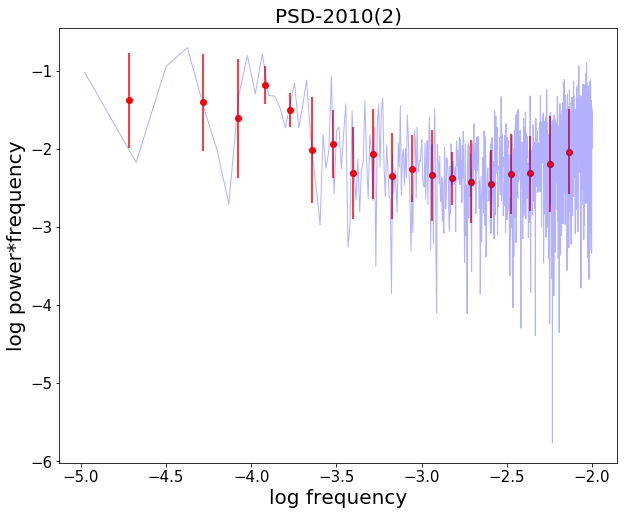

In [8]:
data102 = pd.read_csv("1H0707495_102_rate_0310_tb50_sel.csv")
data102['RATE'] = data102['RATE'].interpolate()


dt=50
counts_data = data102['RATE']
N=len(counts_data)
pnum = np.arange(len(counts_data))
t = [i*dt for i in pnum]


nf = N/2
df = 1/(dt*N)
F_a = np.arange(1,nf+1)
F = [i*df for i in F_a]
F1 = F[0:int(nf)]
mean_x = np.mean(counts_data)
dft = fft(counts_data)
dft1= dft[1:int(nf)+1]
per_data = (abs(dft1)**2)*2*dt/((mean_x**2)*N)
p_times_f_data = np.multiply(np.array(F1),np.array(per_data))

F1_log_102 = [math.log(i,10) for i in F1]
ptf_data_log_00 = [math.log(i,10) for i in p_times_f_data]

# 数据分bin
F1_binned_102 = databin_are(F1,F1)
per_data_binned_102 = databin_are(per_data,F1)
per_data_b_std_102 = databin_are_std(per_data,F1)
p_times_f_data_b_102 = np.array(F1_binned_102)+np.array(per_data_binned_102)


plt.figure(figsize=(10,8))
plt.plot(F1_log_102, ptf_data_log_00, color="b", alpha=0.3, linewidth=1)
plt.scatter(F1_binned_102, p_times_f_data_b_102, color="r", linewidth=1) 
plt.errorbar(F1_binned_102, p_times_f_data_b_102, yerr=per_data_b_std_102, fmt='.r')
plt.xlabel("log frequency",fontsize=20)
plt.ylabel("log power*frequency",fontsize=20)
plt.title("PSD-2010(2)",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

perlist_102 = {'f':F1,'per':per_data}
test = pd.DataFrame(perlist_102,columns = ['f','per'])
test.to_csv('perlist102.csv')

#perb=[10**i for i in per_data_binned_102]
#fb=[10**i for i in F1_binned_102]
#stdb=[10**i for i in per_data_b_std_102]
#perlistbinned_102 = {'f':fb,'per':perb,'std':stdb}
#test = pd.DataFrame(perlistbinned_102,columns = ['f','per','std'])
#test.to_csv('perlistbinned102.csv')

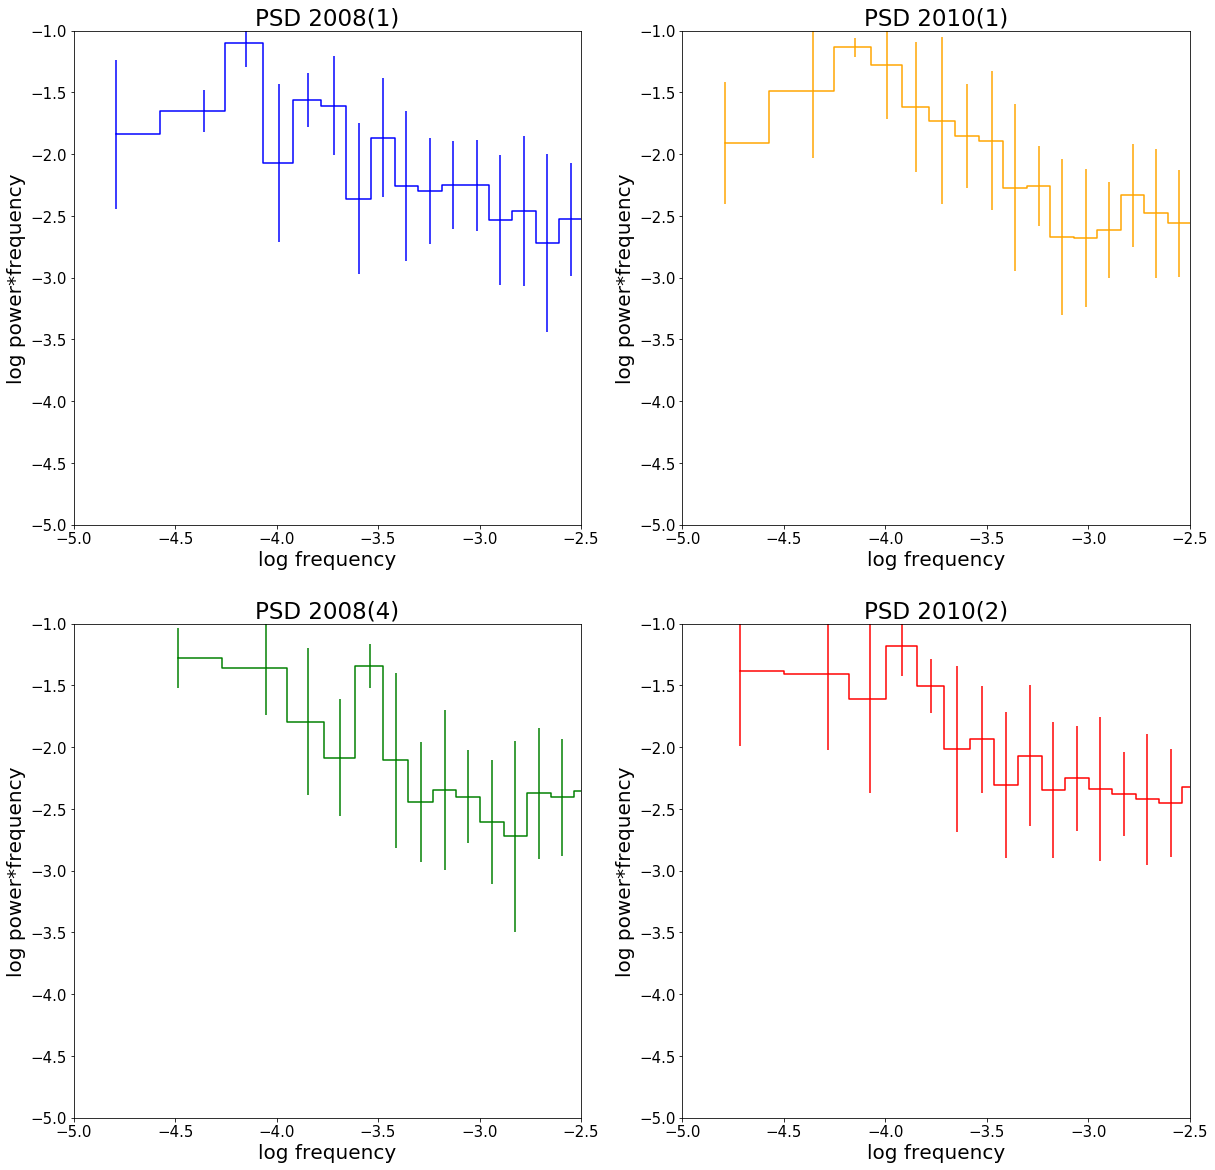

In [9]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.step(F1_binned_081, p_times_f_data_b_081, where='mid',color="b")
ax2.step(F1_binned_101, p_times_f_data_b_101, where='mid',color="orange")
ax3.step(F1_binned_084, p_times_f_data_b_084, where='mid', color="g")
ax4.step(F1_binned_102, p_times_f_data_b_102, where='mid', color="r")


ax1.errorbar(F1_binned_081, p_times_f_data_b_081, yerr=per_data_b_std_081, fmt=',',color="b", label='2008(1)')
ax2.errorbar(F1_binned_101, p_times_f_data_b_101, yerr=per_data_b_std_101, fmt=',',color="orange", label='2010(1)')
ax3.errorbar(F1_binned_084, p_times_f_data_b_084, yerr=per_data_b_std_084, fmt=',',color="g",label='2009(1)')
ax4.errorbar(F1_binned_102, p_times_f_data_b_102, yerr=per_data_b_std_102, fmt=',',color="r",label='2010(2)')


ax1.set_xlabel("log frequency",fontsize=20)
ax1.set_ylabel("log power*frequency",fontsize=20)
ax1.set_xlim(-5.0,-2.5)
ax1.set_ylim(-5,-1)
ax1.tick_params(labelsize=15)
ax1.set_title("PSD 2008(1)",fontsize=23)
ax2.set_xlabel("log frequency",fontsize=20)
ax2.set_ylabel("log power*frequency",fontsize=20)
ax2.set_xlim(-5.0,-2.5)
ax2.set_ylim(-5,-1)
ax2.tick_params(labelsize=15)
ax2.set_title("PSD 2010(1)",fontsize=23)
ax3.set_xlabel("log frequency",fontsize=20)
ax3.set_ylabel("log power*frequency",fontsize=20)
ax3.set_xlim(-5.0,-2.5)
ax3.set_ylim(-5,-1)
ax3.tick_params(labelsize=15)
ax3.set_title("PSD 2008(4)",fontsize=23)
ax4.set_xlabel("log frequency",fontsize=20)
ax4.set_ylabel("log power*frequency",fontsize=20)
ax4.set_xlim(-5.0,-2.5)
ax4.set_ylim(-5,-1)
ax4.tick_params(labelsize=15)
ax4.set_title("PSD 2010(2)",fontsize=23)
plt.show()